<a href="https://colab.research.google.com/github/YishaZukhrufin/MechineLearning/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/MechineLearning/dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8010 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MechineLearning/dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


langkah 3

In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

langkah 4

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
251/251 [==============================] - 1504s 6s/step - loss: 0.6645 - accuracy: 0.5944 - val_loss: 0.5931 - val_accuracy: 0.6735
Epoch 2/25
251/251 [==============================] - 35s 140ms/step - loss: 0.5907 - accuracy: 0.6864 - val_loss: 0.5381 - val_accuracy: 0.7400
Epoch 3/25
251/251 [==============================] - 35s 138ms/step - loss: 0.5423 - accuracy: 0.7258 - val_loss: 0.5466 - val_accuracy: 0.7380
Epoch 4/25
251/251 [==============================] - 35s 139ms/step - loss: 0.5188 - accuracy: 0.7392 - val_loss: 0.5035 - val_accuracy: 0.7630
Epoch 5/25
251/251 [==============================] - 35s 138ms/step - loss: 0.4995 - accuracy: 0.7526 - val_loss: 0.5125 - val_accuracy: 0.7475
Epoch 6/25
251/251 [==============================] - 35s 139ms/step - loss: 0.4717 - accuracy: 0.7697 - val_loss: 0.5200 - val_accuracy: 0.7475
Epoch 7/25
251/251 [==============================] - 35s 139ms/step - loss: 0.4638 - accuracy: 0.7813 - val_loss: 0.4573 - val_acc

langkah 5

In [15]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/MechineLearning/dataset/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 154ms/step


PRAKTIKUM 2

Lagkah 1

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

langkah 2

In [17]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


langkah 3

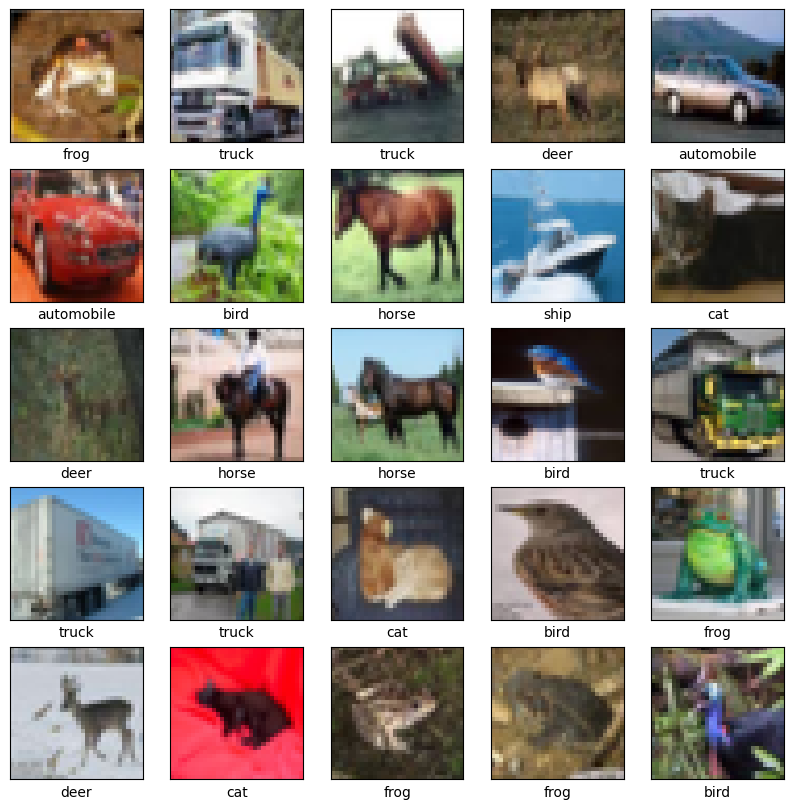

In [31]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

langkah 4

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

langkah 5

In [24]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 13s 6ms/step - loss: 1.5064 - accuracy: 0.4551 - val_loss: 1.2476 - val_accuracy: 0.5520
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1415 - accuracy: 0.5953 - val_loss: 1.0965 - val_accuracy: 0.6056
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9921 - accuracy: 0.6497 - val_loss: 0.9712 - val_accuracy: 0.6555
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8942 - accuracy: 0.6857 - val_loss: 0.9776 - val_accuracy: 0.6581
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8197 - accuracy: 0.7136 - val_loss: 0.9388 - val_accuracy: 0.6651
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7578 - accuracy: 0.7345 - val_loss: 0.9483 - val_accuracy: 0.6736
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7075 - accuracy: 0.7523 - val_loss: 0.8593 - val_accuracy

langkah 6

313/313 - 1s - loss: 0.8677 - accuracy: 0.7094 - 683ms/epoch - 2ms/step


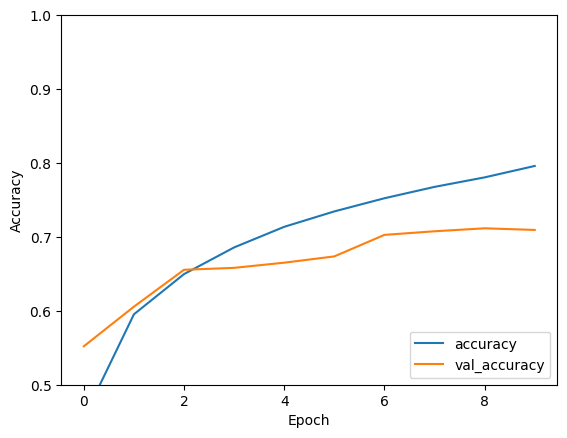

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [26]:
print(test_acc)

0.7093999981880188


tugas

Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

In [27]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [44]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_12 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_13 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                      

In [46]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_12 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_13 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                      

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 19s 9ms/step - loss: 1.6460 - accuracy: 0.4156 - val_loss: 1.2279 - val_accuracy: 0.5580
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1652 - accuracy: 0.5927 - val_loss: 0.9316 - val_accuracy: 0.6677
Epoch 3/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9966 - accuracy: 0.6554 - val_loss: 0.8682 - val_accuracy: 0.6980
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8947 - accuracy: 0.6926 - val_loss: 0.8651 - val_accuracy: 0.7069
Epoch 5/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8255 - accuracy: 0.7185 - val_loss: 0.6974 - val_accuracy: 0.7611
Epoch 6/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7757 - accuracy: 0.7372 - val_loss: 0.6656 - val_accuracy: 0.7690
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7317 - accuracy: 0.7540 - val_loss: 0.6965 - val_a

313/313 - 1s - loss: 0.5375 - accuracy: 0.8288 - 927ms/epoch - 3ms/step


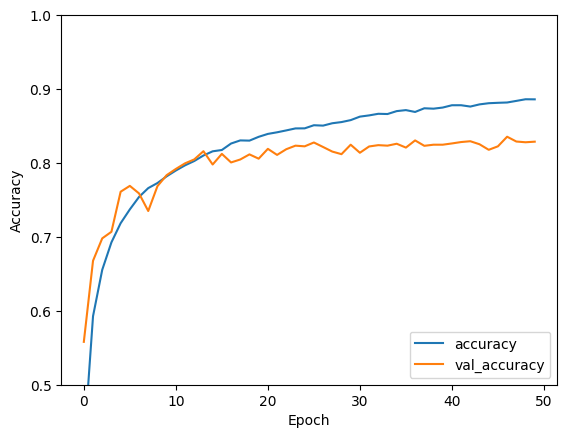

In [50]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [51]:
print(test_acc)

0.8288000226020813


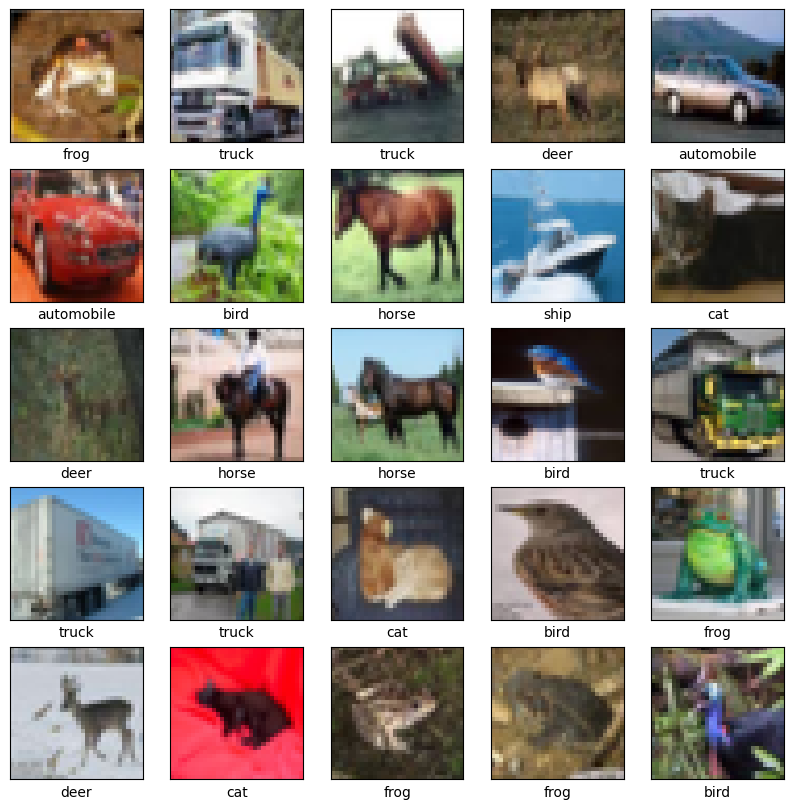

In [52]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Buatlah model CNN untuk klasifikasi dataset MNIST.

In [53]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [56]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [57]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [58]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer menggunakan softmax untuk klasifikasi multikelas

In [59]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [60]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
# Perlu melakukan reshaping pada data untuk sesuai dengan model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [62]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1247 - accuracy: 0.9628 - val_loss: 0.0400 - val_accuracy: 0.9875
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0358 - val_accuracy: 0.9881
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0276 - accuracy: 0.9915 - val_loss: 0.0324 - val_accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0210 - accuracy: 0.9935 - val_loss: 0.0321 - val_accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0366 - val_accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.0281 - val_accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0353 - val_accuracy

313/313 - 1s - loss: 0.0314 - accuracy: 0.9918 - 660ms/epoch - 2ms/step


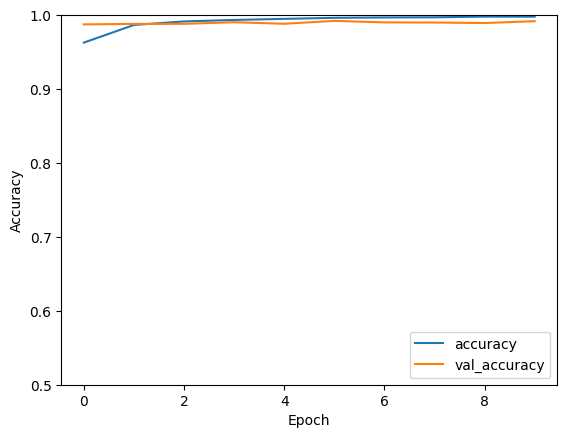

In [64]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [70]:
print(test_acc)

0.9918000102043152


In [66]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [67]:
# Menggunakan model untuk mendapatkan prediksi
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [68]:
# Membuat matriks konfusi
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

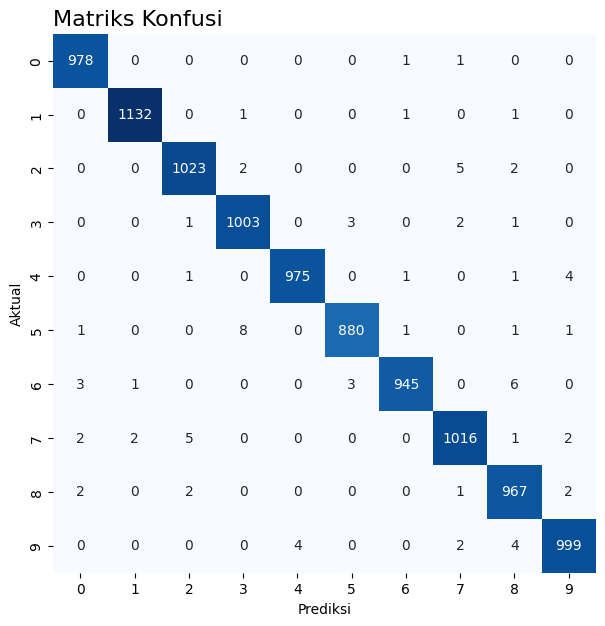

In [69]:
# Menampilkan matriks konfusi menggunakan heatmap
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Matriks Konfusi', loc='left', fontsize=16)
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
plt.show()

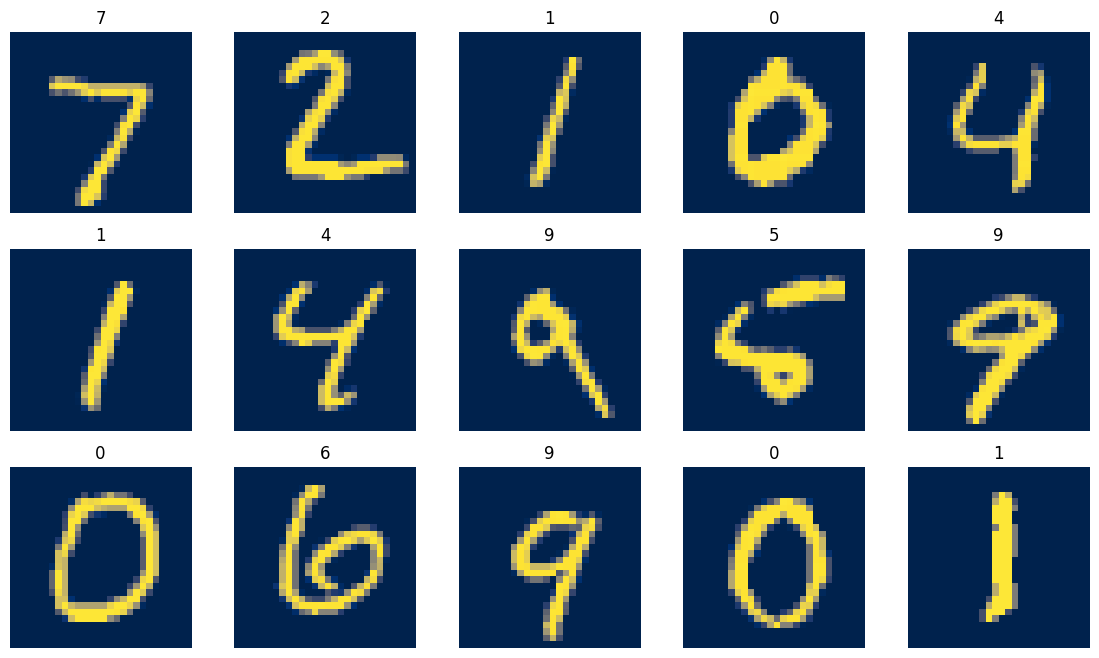

In [72]:
# Mengimport library yang diperlukan
import matplotlib.pyplot as plt

# Menampilkan target yang diprediksi pada setiap gambar
# (label di atas gambar adalah label yang diprediksi)
plt.figure(figsize=(14, 8))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred_classes[ind])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

plt.show()